## Resources:

- [Documentation for MLHub API and dataset](https://radiant-mlhub.s3-us-west-2.amazonaws.com/landcovernet/Documentation.pdf): Here is all the information about labels, dataset structure, etc.
- [Tutorial with notebooks for MLHub](https://github.com/radiantearth/mlhub-tutorials/blob/master/notebooks/radiant-mlhub-landcovernet.ipynb)

In [ ]:
%%capture
!pip -q install rasterio
!pip install fastai --upgrade

In [ ]:
import rasterio as rio
from rasterio.plot import show
from matplotlib import pyplot as plt
import numpy
from fastai.vision.all import *
import matplotlib.patches as mpatches

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load and unzip .tif images that we downloaded here.

In [ ]:
%%capture
!unzip landcovernet_full_1.zip landcovernet_1
!unzip landcovernet_full_2.zip landcovernet_2
!unzip landcovernet_full_3.zip landcovernet_3
!unzip landcovernet_full_4.zip landcovernet_4

# Save images as RGB

In [ ]:
def get_rgb(path_dict) :
  red = rio.open(path_dict['red']).read(1) # B4
  green = rio.open(path_dict['green']).read(1) # B3
  blue = rio.open(path_dict['blue']).read(1) # B2

  rgb = np.dstack((red, green, blue))

  # normalize and convert to range 0-255
  rgb = ((rgb - rgb.min()) / (rgb.max() - rgb.min()) * 255).astype(int)
  return rgb

In [ ]:
def get_labels(path_dict):
  labels = rio.open(path_dict['label']).read(1) # LC_10m.tif file
  return labels

Create RGB version of the images and save in a new folder **landcovernet_RGB**

In [ ]:
Path('landcovernet_RGB/inputs').mkdir(parents=True, exist_ok=True)
Path('landcovernet_RGB/targets').mkdir(parents=True, exist_ok=True)

In [ ]:
for i in range(4) :
  for loc in Path(f'landcovernet_{i+1}').ls(): 
    rgbnl = {}
    for img in loc.ls():
      if re.search('.*_B04_10m.tif', str(img)) : rgbnl['red']   = img
      if re.search('.*_B03_10m.tif', str(img)) : rgbnl['green'] = img  
      if re.search('.*_B02_10m.tif', str(img)) : rgbnl['blue']  = img
      if re.search('.*_B08_10m.tif', str(img)) : rgbnl['nir']   = img
      if re.search('.*_LC_10m.tif', str(img))  : rgbnl['label'] = img
    rgb = get_rgb(rgbnl)
    lbl = get_labels(rgbnl)

    filename = re.findall('.+/.+/(.*)_B04_10m.tif', str(rgbnl['red']))[0]
    im = Image.fromarray(lbl.astype('uint8'))
    plt.imsave('landcovernet_RGB/inputs/' + filename + '_RGB.png', rgb.astype('uint8'))
    im.save(Path('landcovernet_RGB/targets/' + filename + '_LC_10m.png'))

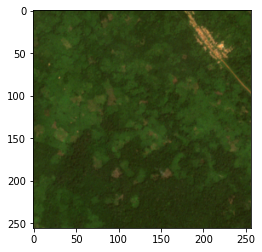

In [ ]:
# test if this works
plt.imshow(get_rgb(rgbnl))

# Export labels in color to filter out manually

In [ ]:
def get_rgb(path_dict) :
  red = rio.open(path_dict['red']).read(1) # B4
  green = rio.open(path_dict['green']).read(1) # B3
  blue = rio.open(path_dict['blue']).read(1) # B2

  rgb = np.dstack((red, green, blue))

  # normalize and convert to range 0-255
  rgb = ((rgb - rgb.min()) / (rgb.max() - rgb.min()) * 255).astype(int)
  return rgb

In [ ]:
def get_labels(path):
  labels = rio.open(path).read(1) # LC_10m.tif file
  return labels

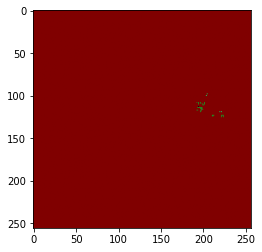

In [ ]:
labels = {0:'Unknown', 1:'Water', 2:'Artificial soil', 3:'Natural soil', 4:'Snow/Ice', 5:'Woody vegetation', 6:'Cultivated vegetation', 7:'Natural vegetation'}
colors = {0:'k', 1:'b', 2:'gray', 3:'maroon', 4:'whitesmoke', 5:'forestgreen', 6:'orange', 7:'springgreen'}
patches = [ mpatches.Patch(color=colors[i], label=f'{labels[i]}') for i in range(len(labels)) ]

Path('labels').mkdir(parents=True, exist_ok=True)

for loc in Path('landcovernet').ls() :
  for img in loc.ls() :
    if re.search('.*_LC_10m.tif', str(img)) : path = img
  filename = str(path).split('/')[-1].split('.')[0]
  #print(filename)
  im = np.array([[matplotlib.colors.to_rgb(colors[i]) for i in j] for j in get_labels(path)])
  plt.imsave('labels/' + filename + '.png', im)

In [ ]:
%%capture
!zip -r labels.zip labels

Now, I did this:
1. Download the archive
2. Manually delete labels where the annotation was poorly performed 
With 1980 labels, it took me around 30 minutes. Unfortunately, I had to discard over 50% of the labels. I saved the filtered labels as **labels.zip** and uploaded here again.

# Load filtered labels and delete images that have no labels

Delete the old **labels** folder and upload the archive with filtered labels into Colab.

In [ ]:
shutil.rmtree('labels')

In [ ]:
!unzip labels.zip

Archive:  labels.zip
   creating: labels/
   creating: labels/labels_full/
   creating: labels/labels_full/.ipynb_checkpoints/
  inflating: labels/labels_full/28QDE_00_2018_LC_10m.png  
  inflating: labels/labels_full/28QDE_01_2018_LC_10m.png  
  inflating: labels/labels_full/28QDE_02_2018_LC_10m.png  
  inflating: labels/labels_full/28QDE_03_2018_LC_10m.png  
  inflating: labels/labels_full/28QDE_04_2018_LC_10m.png  
  inflating: labels/labels_full/28QDE_05_2018_LC_10m.png  
  inflating: labels/labels_full/28QDE_06_2018_LC_10m.png  
  inflating: labels/labels_full/28QDE_07_2018_LC_10m.png  
  inflating: labels/labels_full/28QDE_08_2018_LC_10m.png  
  inflating: labels/labels_full/28QDE_09_2018_LC_10m.png  
  inflating: labels/labels_full/28QDE_10_2018_LC_10m.png  
  inflating: labels/labels_full/28QDE_11_2018_LC_10m.png  
  inflating: labels/labels_full/28QDE_12_2018_LC_10m.png  
  inflating: labels/labels_full/28QDE_13_2018_LC_10m.png  
  inflating: labels/labels_full/28QDE_14_2018_L

In [ ]:
paths = Path('labels').ls()
locs = [re.findall(r'(.*)_2018_LC_10m.png', str(path).split('/')[-1]) for path in paths]
locs = list(itertools.chain(*locs)) # unpack lists inside of lists
len(locs)

920

Remove RGB images that have **no label** because we deleted it due to bad quality

In [ ]:
for img in Path('landcovernet_RGB/inputs').ls() :
  imname = re.findall(r'(.*_[0-9]+)_2018[0-9]+_RGB.png', str(img).split('/')[-1])[0]
  if not imname in locs : 
    os.remove(img)

In [ ]:
%%capture
!zip -r landcovernet_RGB_hq_labels.zip landcovernet_RGB

# Remove cloudy images that bypassed the first assessment

Next step: Even though theoretically, we should have clean data by now, there are still images with clouds present in the training data. This is because the "non-cloudy" images were simply *estimated* as such, but it cannot be guaranteed. To remove cloudy images, I had to download and unzip the **landcovernet_RGB_hq_labels.zip** archive, open the folder with the images on my PC, go through them manually and simply delete from the dataset using `del` button.

After deleting the last cloudy images as well as poorly labeled images, we are left with 2512 inputs and 920 labels.

Now, I delete the old archive.

In [ ]:
os.remove('landcovernet_RGB_hq_labels.zip')

Upload the clean archive again to colab and unzip here.

In [ ]:
%%capture
!unzip landcovernet_RGB_hq_labels.zip

# Convert the labels to the manner KRCS wants it and re-save label masks

KRCS:
1. Cropland
2. Pastureland
3. Bare soil
4. Open water
5. Forestland
6. Otherland

LCN classes:

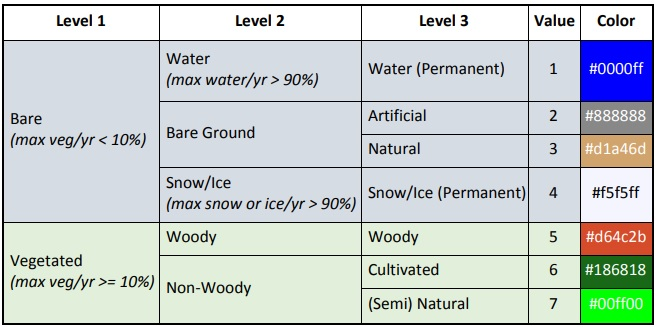

Convert 4 (*Snow/Ice*), 0 (*Unknown*), and 2 (*Artificial ground*) -> to *Otherland*

In [ ]:
for pic in Path('landcovernet_RGB/targets').ls(): 
  # for img in loc.ls():
  #   if re.search('.*_LC_10m.tif', str(img))  : path = img
  lbl = get_labels(pic)

  # reset the labels
  lbl[(lbl == 0) | (lbl == 2) | (lbl == 4)] = 8       # unknown, artificial, snow -> otherland (temporarily)
  lbl[lbl == 7] = 2                                   # (semi) natural -> pastureland/open grassland
  lbl[lbl == 1] = 4                                   # water (permanent) -> open water
  lbl[lbl == 6] = 1                                   # cultivated -> cropland
  lbl[lbl == 8] = 6                                   # reset the otherland to 6

  filename = str(path).split('/')[-1].split('.')[0]
  im = Image.fromarray(lbl.astype('uint8'))
  im.save(pic)

Finally, I saved the completely prepared and clean data as `landcovernet_final.zip`

This is the archive that we will use in the training.